# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "mondo-ncit-renal-subset"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:exactMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,familial juvenile gouty nephropathy,lexmatch
1,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:exactMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,familial nephropathy with gout,lexmatch
2,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:exactMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,"gouty nephropathy, familial juvenile",lexmatch
3,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:exactMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,"nephropathy, familial, with gout",lexmatch
4,MONDO:0000909,Bartter disease type 4B,skos:exactMatch,MONDO:0011242,Bartter disease type 4A,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,oio:hasRelatedSynonym,"bartter syndrome, infantile, with sensorineura...",lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:exactMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,lexmatch
415,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,lexmatch
416,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal failure,lexmatch
417,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,rdfs:label,chronic renal failure,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label  \
subject_match_field   object_match_field                                 
oio:hasBroadSynonym   oio:hasExactSynonym             2              2   
oio:hasDbXref         oio:hasDbXref                  43             43   
oio:hasDbXref-INVERSE oio:hasDbXref-INVERSE           1              1   
oio:hasExactSynonym   oio:hasBroadSynonym            10             10   
                      oio:hasExactSynonym            81             81   
                      oio:hasRelatedSynonym           9              9   
                      rdfs:label                     22             22   
oio:hasNarrowSynonym  oio:hasExactSynonym             3              3   
                      oio:hasRelatedSynonym           2              2   
                      rdfs:label                      1              1   
oio:hasRelatedSynonym oio:hasExactSynonym            15             15   
                      oio:hasNarrowSynonym            2              2   
                      oio:hasRelatedSynonym           9              9   
                      rdfs:label                      4              4   
rdf:ID                oio:hasDbXref-INVERSE          25             25   
rdfs:label            oio:hasBroadSynonym             1              1   
                      oio:hasExactSynonym            17             17   
                      oio:hasRelatedSynonym           4              4   
                      rdfs:label                     12             12   

                                             predicate_id  object_id  \
subject_match_field   object_match_field                               
oio:hasBroadSynonym   oio:hasExactSynonym               2          2   
oio:hasDbXref         oio:hasDbXref                    43         43   
oio:hasDbXref-INVERSE oio:hasDbXref-INVERSE             1          1   
oio:hasExactSynonym   oio:hasBroadSynonym              10         10   
                      oio:hasExactSynonym              81         81   
                      oio:hasRelatedSynonym             9          9   
                      rdfs:label                       22         22   
oio:hasNarrowSynonym  oio:hasExactSynonym               3          3   
                      oio:hasRelatedSynonym             2          2   
                      rdfs:label                        1          1   
oio:hasRelatedSynonym oio:hasExactSynonym              15         15   
                      oio:hasNarrowSynonym              2          2   
                      oio:hasRelatedSynonym             9          9   
                      rdfs:label                        4          4   
rdf:ID                oio:hasDbXref-INVERSE            25         25   
rdfs:label            oio:hasBroadSynonym               1          1   
                      oio:hasExactSynonym              17         17   
                      oio:hasRelatedSynonym             4          4   
                      rdfs:label                       12         12   

                                             object_label  \
subject_match_field   object_match_field                    
oio:hasBroadSynonym   oio:hasExactSynonym               2   
oio:hasDbXref         oio:hasDbXref                    43   
oio:hasDbXref-INVERSE oio:hasDbXref-INVERSE             1   
oio:hasExactSynonym   oio:hasBroadSynonym              10   
                      oio:hasExactSynonym              81   
                      oio:hasRelatedSynonym             9   
                      rdfs:label                       22   
oio:hasNarrowSynonym  oio:hasExactSynonym               3   
                      oio:hasRelatedSynonym             2   
                      rdfs:label                        1   
oio:hasRelatedSynonym oio:hasExactSynonym              15   
                      oio:hasNarrowSynonym              2   
                      oio:hasRelatedSynonym             9   
                      rdfs:label                        4   
r

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0002350,familial nephrotic syndrome,skos:exactMatch,NCIT:C35337,Congenital Nephrotic Syndrome,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0002350,curated
6,MONDO:0003008,hereditary renal cell carcinoma,skos:exactMatch,NCIT:C39789,Hereditary Renal Cell Carcinoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003008,curated
11,MONDO:0003321,hereditary Wilms tumor,skos:exactMatch,NCIT:C8496,Hereditary Kidney Wilms Tumor,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003321,curated
15,MONDO:0003789,hereditary papillary renal cell carcinoma,skos:exactMatch,NCIT:C9222,Hereditary Papillary Renal Cell Carcinoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003789,curated
21,MONDO:0003824,hereditary kidney oncocytoma,skos:exactMatch,NCIT:C8960,Hereditary Kidney Oncocytoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0003824,curated
24,MONDO:0004691,autosomal dominant polycystic kidney disease,skos:exactMatch,NCIT:C84578,Autosomal Dominant Polycystic Kidney Disease,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0004691,curated
35,MONDO:0005342,IgA glomerulonephritis,skos:exactMatch,NCIT:C34643,IgA Nephropathy,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0005342,curated
44,MONDO:0005798,HIV-associated nephropathy,skos:exactMatch,NCIT:C26918,HIV-Associated Nephropathy,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0005798,curated
48,MONDO:0007416,Balkan nephropathy,skos:exactMatch,NCIT:C123025,Aristolochic Acid Nephropathy,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0007416,curated
59,MONDO:0007888,hereditary leiomyomatosis and renal cell cancer,skos:exactMatch,NCIT:C51302,Hereditary Leiomyomatosis and Renal Cell Carci...,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0007888,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:relatedMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,familial juvenile gouty nephropathy,gpt3
1,MONDO:0000909,Bartter disease type 4B,skos:relatedMatch,MONDO:0011242,Bartter disease type 4A,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasRelatedSynonym,oio:hasRelatedSynonym,"bartter syndrome, infantile, with sensorineura...",gpt3
2,MONDO:0002350,familial nephrotic syndrome,skos:exactMatch,NCIT:C35337,Congenital Nephrotic Syndrome,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,congenital nephrotic syndrome,gpt3
3,MONDO:0003008,hereditary renal cell carcinoma,skos:exactMatch,NCIT:C39789,Hereditary Renal Cell Carcinoma,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,hereditary renal cell cancer,gpt3
4,MONDO:0003321,hereditary Wilms tumor,skos:exactMatch,MONDO:0008679,Wilms tumor 1,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasNarrowSynonym,oio:hasRelatedSynonym,wt1,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:narrowMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt3
113,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt3
114,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt3
115,NCIT:C80078,Chronic Kidney Disease,skos:narrowMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,MONDO:0000608,familial juvenile hyperuricemic nephropathy,skos:narrowMatch,MONDO:0008073,familial juvenile hyperuricemic nephropathy ty...,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,familial juvenile gouty nephropathy,gpt4
1,MONDO:0000909,Bartter disease type 4B,skos:relatedMatch,MONDO:0011242,Bartter disease type 4A,semapv:LexicalMatching,MONDO,MONDO,oaklib,0.5,oio:hasRelatedSynonym,oio:hasRelatedSynonym,"bartter syndrome, infantile, with sensorineura...",gpt4
2,MONDO:0002350,familial nephrotic syndrome,skos:exactMatch,NCIT:C35337,Congenital Nephrotic Syndrome,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,congenital nephrotic syndrome,gpt4
3,MONDO:0003008,hereditary renal cell carcinoma,skos:exactMatch,NCIT:C39789,Hereditary Renal Cell Carcinoma,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,hereditary renal cell cancer,gpt4
4,MONDO:0003321,hereditary Wilms tumor,skos:exactMatch,NCIT:C8496,Hereditary Kidney Wilms Tumor,semapv:LexicalMatching,MONDO,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,hereditary kidney adenosarcoma,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt4
113,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt4
114,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt4
115,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id  \
mapping_source predicate_id                                              
gpt3           owl:differentFrom          17             17         17   
               skos:broadMatch             4              4          4   
               skos:exactMatch            45             45         45   
               skos:narrowMatch           17             17         17   
               skos:relatedMatch          34             34         34   
gpt4           owl:differentFrom           9              9          9   
               skos:broadMatch             2              2          2   
               skos:exactMatch            33             33         33   
               skos:narrowMatch           29             29         29   
               skos:relatedMatch          44             44         44   

                                  object_label  mapping_justification  \
mapping_source predicate_id                                             
gpt3           owl:differentFrom            17                     17   
               skos:broadMatch               4                      4   
               skos:exactMatch              45                     45   
               skos:narrowMatch             17                     17   
               skos:relatedMatch            34                     34   
gpt4           owl:differentFrom             9                      9   
               skos:broadMatch               2                      2   
               skos:exactMatch              33                     33   
               skos:narrowMatch             29                     29   
               skos:relatedMatch            44                     44   

                                  subject_source  object_source  mapping_tool  \
mapping_source predicate_id                                                     
gpt3           owl:differentFrom              17             17            17   
               skos:broadMatch                 4              4             4   
               skos:exactMatch                45             45            45   
               skos:narrowMatch               17             17            17   
               skos:relatedMatch              34             34            34   
gpt4           owl:differentFrom               9              9             9   
               skos:broadMatch                 2              2             2   
               skos:exactMatch                33             33            33   
               skos:narrowMatch               29             29            29   
               skos:relatedMatch              44             44            44   

                                  confidence  subject_match_field  \
mapping_source predicate_id                                         
gpt3           owl:differentFrom          17                   17   
               skos:broadMatch             4                    4   
               skos:exactMatch            45                   45   
               skos:narrowMatch           17                   17   
               skos:relatedMatch          34                   34   
gpt4           owl:differentFrom           9                    9   
               skos:broadMatch             2                    2   
               skos:exactMatch            33                   33   
               skos:narrowMatch           29                   29   
               skos:relatedMatch          44                   44   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                  17            17  
               skos:broadMatch                     4             4  
               skos:exactMatch                    45            45  
               skos:narrowMatch                   17            17  
               skos:relatedMatch                  34

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,MONDO:0012546,NCIT:C123098,0.75,skos:exactMatch,"nephrotic syndrome, type 3",Nephrotic Syndrome - PLCE1 Associated,logmap
1,MONDO:0007888,NCIT:C51302,0.72,skos:exactMatch,hereditary leiomyomatosis and renal cell cancer,Hereditary Leiomyomatosis and Renal Cell Carci...,logmap
2,MONDO:0013619,NCIT:C123099,0.75,skos:exactMatch,"nephrotic syndrome, type 6",Nephrotic Syndrome - PTPRO Associated,logmap
3,MONDO:0011165,NCIT:C187984,0.75,skos:exactMatch,glomerulopathy with fibronectin deposits 2,Glomerulopathy with Fibronectin Deposits-2,logmap
4,MONDO:0005334,NCIT:C26833,0.55,skos:exactMatch,hereditary nephritis,Nephritis,logmap
5,MONDO:0011390,NCIT:C37308,0.66,skos:exactMatch,focal segmental glomerulosclerosis 2,Focal Segmental Glomerulosclerosis,logmap
6,MONDO:0014373,NCIT:C123080,0.75,skos:exactMatch,"nephrotic syndrome, type 10",Nephrotic Syndrome - EMP2 Associated,logmap
7,MONDO:0003008,NCIT:C39789,0.93,skos:exactMatch,hereditary renal cell carcinoma,Hereditary Renal Cell Carcinoma,logmap
8,MONDO:0013131,NCIT:C123166,1.04,skos:exactMatch,polycystic kidney disease 2,Autosomal Dominant Polycystic Kidney Disease T...,logmap
9,MONDO:0003824,NCIT:C8960,0.79,skos:exactMatch,hereditary kidney oncocytoma,Hereditary Kidney Oncocytoma,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
7,MONDO:0003008,NCIT:C39789,0.93,skos:exactMatch,hereditary renal cell carcinoma,Hereditary Renal Cell Carcinoma,logmap
8,MONDO:0013131,NCIT:C123166,1.04,skos:exactMatch,polycystic kidney disease 2,Autosomal Dominant Polycystic Kidney Disease T...,logmap
10,MONDO:0008264,NCIT:C123171,0.94,skos:exactMatch,autosomal dominant medullary cystic kidney dis...,Medullary Cystic Kidney Disease Type I,logmap
11,MONDO:0019005,NCIT:C123200,1.17,skos:exactMatch,nephronophthisis,Nephronophthisis,logmap
12,MONDO:0009728,NCIT:C74998,0.96,skos:exactMatch,nephronophthisis 1,Nephronophthisis 1,logmap
15,MONDO:0009889,NCIT:C84579,1.10,skos:exactMatch,autosomal recessive polycystic kidney disease,Autosomal Recessive Polycystic Kidney Disease,logmap
17,MONDO:0004691,NCIT:C84578,0.93,skos:exactMatch,autosomal dominant polycystic kidney disease,Autosomal Dominant Polycystic Kidney Disease,logmap
19,MONDO:0009733,NCIT:C121198,0.88,skos:exactMatch,"nephrotic syndrome, type 4",Congenital Nephrotic Syndrome - Diffuse Mesang...,logmap
21,MONDO:0009732,NCIT:C122795,0.88,skos:exactMatch,"congenital nephrotic syndrome, Finnish type",Nephrotic Syndrome - NPHS1 Associated,logmap
22,MONDO:0018492,NCIT:C36260,0.95,skos:exactMatch,hereditary clear cell renal cell carcinoma,Hereditary Clear Cell Renal Cell Carcinoma,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.48571428571428565, 0.37777777777777777, 0.68)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.68, 0.7213114754098361),
 (0.75, 0.72),
 (0.69, 0.711864406779661),
 (0.67, 0.6984126984126985),
 (0.78, 0.6938775510204083)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,MONDO:0012546,NCIT:C123098,0.75,skos:exactMatch,"nephrotic syndrome, type 3",Nephrotic Syndrome - PLCE1 Associated,logmap
1,MONDO:0007888,NCIT:C51302,0.72,skos:exactMatch,hereditary leiomyomatosis and renal cell cancer,Hereditary Leiomyomatosis and Renal Cell Carci...,logmap
2,MONDO:0013619,NCIT:C123099,0.75,skos:exactMatch,"nephrotic syndrome, type 6",Nephrotic Syndrome - PTPRO Associated,logmap
3,MONDO:0011165,NCIT:C187984,0.75,skos:exactMatch,glomerulopathy with fibronectin deposits 2,Glomerulopathy with Fibronectin Deposits-2,logmap
6,MONDO:0014373,NCIT:C123080,0.75,skos:exactMatch,"nephrotic syndrome, type 10",Nephrotic Syndrome - EMP2 Associated,logmap
7,MONDO:0003008,NCIT:C39789,0.93,skos:exactMatch,hereditary renal cell carcinoma,Hereditary Renal Cell Carcinoma,logmap
8,MONDO:0013131,NCIT:C123166,1.04,skos:exactMatch,polycystic kidney disease 2,Autosomal Dominant Polycystic Kidney Disease T...,logmap
9,MONDO:0003824,NCIT:C8960,0.79,skos:exactMatch,hereditary kidney oncocytoma,Hereditary Kidney Oncocytoma,logmap
10,MONDO:0008264,NCIT:C123171,0.94,skos:exactMatch,autosomal dominant medullary cystic kidney dis...,Medullary Cystic Kidney Disease Type I,logmap
11,MONDO:0019005,NCIT:C123200,1.17,skos:exactMatch,nephronophthisis,Nephronophthisis,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.352,0.214,1.000
1,logmap,0.721,0.611,0.880
2,gpt3,0.486,0.378,0.680
3,gpt4,0.793,0.697,0.920


In [18]:
import matplotlib.pyplot as plt

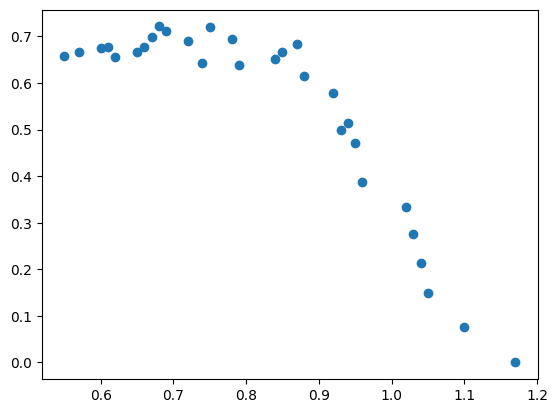

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


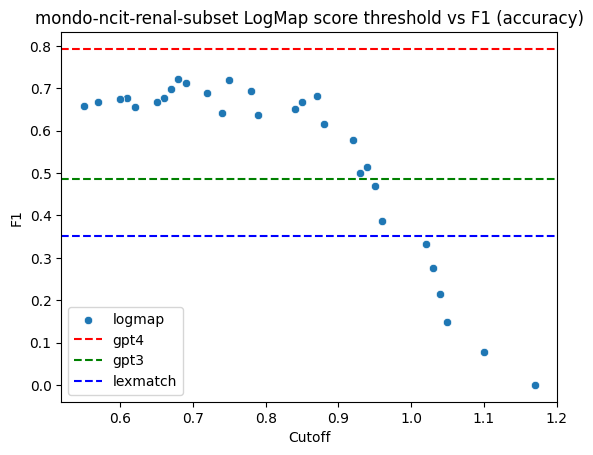

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.png", format='png')
plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('MONDO:0008263',
  'polycystic kidney disease 1',
  'NCIT:C123167',
  'Autosomal Dominant Polycystic Kidney Disease Type I'),
 ('MONDO:0008264',
  'autosomal dominant medullary cystic kidney disease with or without hyperuricemia',
  'NCIT:C123171',
  'Medullary Cystic Kidney Disease Type I'),
 ('MONDO:0008679',
  'Wilms tumor 1',
  'NCIT:C27730',
  'Childhood Kidney Wilms Tumor'),
 ('MONDO:0008680',
  'Wilms tumor 2',
  'NCIT:C27730',
  'Childhood Kidney Wilms Tumor'),
 ('MONDO:0010974',
  'nephrotic syndrome, type 2',
  'NCIT:C123095',
  'Nephrotic Syndrome - NPHS2 Associated'),
 ('MONDO:0012546',
  'nephrotic syndrome, type 3',
  'NCIT:C123098',
  'Nephrotic Syndrome - PLCE1 Associated'),
 ('MONDO:0013619',
  'nephrotic syndrome, type 6',
  'NCIT:C123099',
  'Nephrotic Syndrome - PTPRO Associated'),
 ('MONDO:0014099',
  'nephrotic syndrome, type 8',
  'NCIT:C123071',
  'Nephrotic Syndrome - ARHGDIA Associated'),
 ('MONDO:0014373',
  'nephrotic syndrome, type 10',
  'NCIT:C123080',
